NLTK version: 3.7


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ARYAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ARYAN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ARYAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ARYAN\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Missing Values:
 Class      0
Message    0
dtype: int64

Class Distribution:
 Class
ham     4827
spam     747
Name: count, dtype: int64


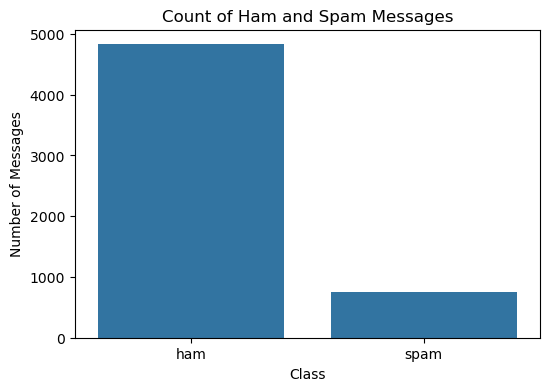

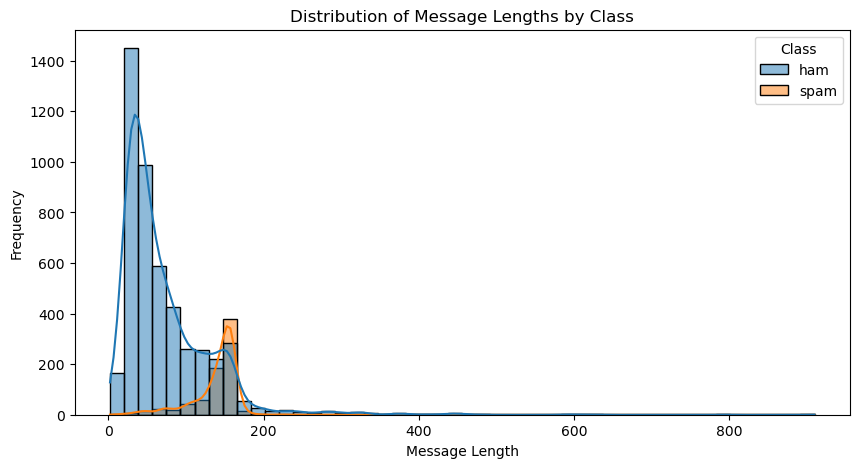

Training set size: 4459
Testing set size: 1115

Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       954
           1       0.99      0.81      0.89       161

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Confusion Matrix:
[[953   1]
 [ 30 131]]


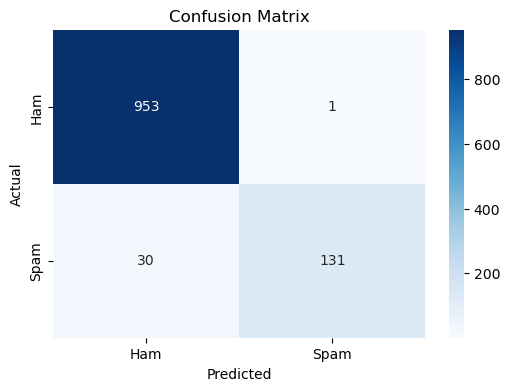


Model and Vectorizer have been saved as .pkl files.


In [1]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk.tokenize import TreebankWordTokenizer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print("NLTK version:", nltk.__version__)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

df = pd.read_csv('Spam_SMS.csv')
df.head()

print("Missing Values:\n", df.isnull().sum())
print("\nClass Distribution:\n", df['Class'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Count of Ham and Spam Messages')
plt.xlabel('Class')
plt.ylabel('Number of Messages')
plt.show()

df['Message_Length'] = df['Message'].apply(len)
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Message_Length', hue='Class', bins=50, kde=True)
plt.title('Distribution of Message Lengths by Class')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

tokenizer = TreebankWordTokenizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub(r'\b\w{1,2}\b', '', text)
    # Use TreebankWordTokenizer instead of word_tokenize
    tokens = tokenizer.tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    cleaned_text = ' '.join(tokens)
    return cleaned_text

df['Cleaned_Message'] = df['Message'].apply(preprocess_text)
df[['Message', 'Cleaned_Message']].head()

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['Cleaned_Message'])
df['Label_Num'] = df['Class'].map({'ham': 0, 'spam': 1})
y = df['Label_Num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy: {accuracy:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

import pickle

with open('spam_classifier_model.pkl', 'wb') as model_file:
    pickle.dump(nb_model, model_file)

with open('tfidf_vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(tfidf_vectorizer, vec_file)

print("\nModel and Vectorizer have been saved as .pkl files.")